<a href="https://colab.research.google.com/github/saraalo00sa/customer-anomaly-detection/blob/main/Customer_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand the distribution of transaction types, identify the proportion of fraudulent transactions, and examine the statistics of transaction amounts. This step helps reveal patterns and anomalies that may indicate fraud.



   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
isFraud
0    6354407
1       8213
Name: count, dtype: int64


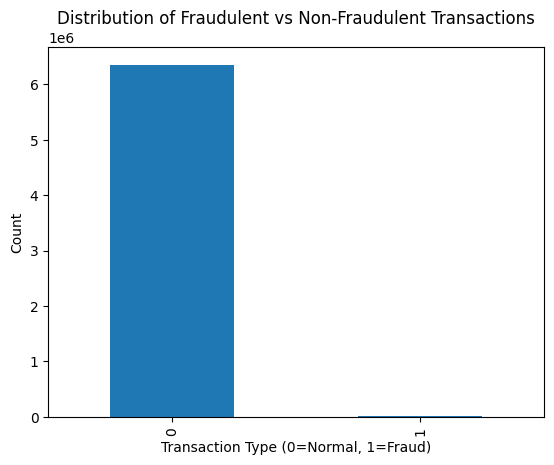

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة ملف البيانات
df = pd.read_csv('/content/Dataset_Customer_Anomaly_Detection.csv')

# عرض أول 5 صفوف من البيانات
print(df.head())

# عرض عدد المعاملات الاحتيالية مقابل الطبيعية
print(df['isFraud'].value_counts())

# رسم توزيع المعاملات الاحتيالية مقابل غير الاحتيالية
df['isFraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.show()

# إحصائيات عن عمود المبالغ
print(df['amount'].describe())

# عرض أنواع المعاملات وعددها
print(df['type'].value_counts())


## 🔥 Data Correlation Analysis (Heatmap)

In this section, we analyze the correlation between different numerical features using a heatmap.

### ✅ Why do we use a heatmap?
A heatmap helps us visualize the relationships (correlations) between multiple features in our dataset.

- The values range from **-1 to 1**:
  - **+1** → strong positive correlation (when one feature increases, the other tends to increase).
  - **-1** → strong negative correlation (when one feature increases, the other tends to decrease).
  - **0** → no correlation (features are independent).
  





   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
isFraud
0    6354407
1       8213
Name: count, dtype: int64


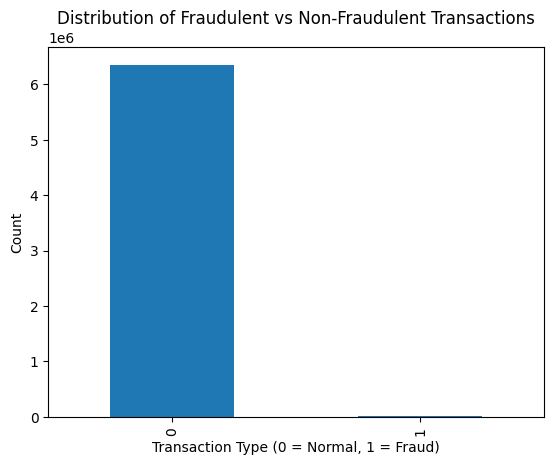

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


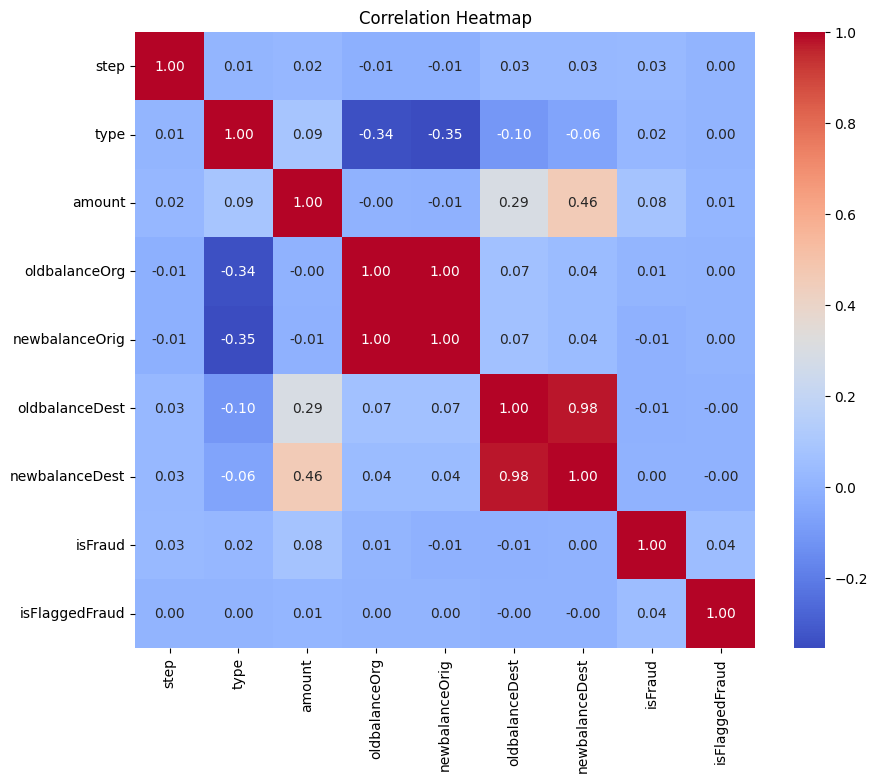

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# قراءة ملف البيانات
df = pd.read_csv('/content/Dataset_Customer_Anomaly_Detection.csv')

# عرض أول 5 صفوف
print(df.head())

# عدد المعاملات الاحتيالية مقابل الطبيعية
print(df['isFraud'].value_counts())

# رسم توزيع المعاملات الاحتيالية مقابل غير الاحتيالية
df['isFraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# إحصائيات عن المبالغ
print(df['amount'].describe())

# أنواع المعاملات وعددها
print(df['type'].value_counts())

# ✅ تحويل نوع المعاملة إلى أرقام (لأن heatmap يحتاج أرقام)
df_encoded = df.copy()
df_encoded['type'] = df_encoded['type'].astype('category').cat.codes

# ✅ حذف الأعمدة النصية الغير مفيدة للارتباط
columns_to_drop = ['nameOrig', 'nameDest']
df_encoded.drop(columns=columns_to_drop, inplace=True)

# ✅ حساب مصفوفة الارتباط
corr = df_encoded.corr()

# ✅ رسم Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 🧹 Data Cleaning and Analysis

This section performs initial loading, cleaning, and preparation of the dataset before conducting deeper analysis and modeling.



In [7]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Dataset_Customer_Anomaly_Detection.csv')


print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


print("\nColumn types:")
print(df.dtypes)


print("\nMissing values:\n", df.isnull().sum())
print("Duplicated rows:", df.duplicated().sum())

# تنظيف البيانات: إزالة المكررات والقيم المفقودة
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# إعادة ضبط الفهرسة
df.reset_index(drop=True, inplace=True)

# تحويل بعض الأعمدة إلى أرقام صحيحة
df['isFraud'] = df['isFraud'].astype(int)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(int)

columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
df.drop(columns=columns_to_drop, inplace=True)


# التأكد من التنظيف النهائي
print("\n✅ Data cleaned successfully!")
print("Updated shape:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())

cleaned_file_path = '/content/Cleaned_Dataset_Customer_Anomaly_Detection.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"\n✅ Cleaned file saved successfully at: {cleaned_file_path}")


Dataset shape: (6362620, 11)

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Column types:
step                int64
type               o

## ⚖️ Data Balancing using CTGAN

In our dataset, we observed a severe class imbalance problem: the number of fraudulent transactions is much smaller than the number of normal transactions. This can cause the model to focus too much on the majority class (non-fraud) and fail to detect fraud effectively.

### 💡 Why CTGAN?

CTGAN (Conditional Tabular GAN) is a generative model designed specifically for tabular data. It can generate synthetic samples for the minority class (fraudulent transactions), helping us balance the dataset and improve model performance.




In [8]:
!pip install ctgan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [16]:
import pandas as pd

# قراءة البيانات الأصلية
df_original = pd.read_csv(r'/content/Cleaned_Dataset_Customer_Anomaly_Detection.csv')

# قراءة البيانات الصناعية
df_synthetic = pd.read_csv(r'/content/Synthetic_Fraud_Data.csv')

# طباعة أشكال الملفات للتأكد
print("Original shape:", df_original.shape)
print("Synthetic shape:", df_synthetic.shape)

# دمج البيانات
df_combined = pd.concat([df_original, df_synthetic], ignore_index=True)

# حفظ الملف المدمج
df_combined.to_csv(r'customer_anomaly_detection\Combined_Dataset.csv', index=False)

print("✅ Done! Combined file saved as: customer_anomaly_detection\\Combined_Dataset.csv")


Original shape: (6362620, 8)
Synthetic shape: (5000, 8)
✅ Done! Combined file saved as: customer_anomaly_detection\Combined_Dataset.csv


## 🤖 Model Training and Evaluation

After balancing the data using CTGAN, we are now ready to train our classification model to detect fraudulent transactions.







In [14]:
# استيراد المكتبات
import pandas as pd
import matplotlib.pyplot as plt
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# قراءة البيانات الأصلية
df = pd.read_csv('/content/Cleaned_Dataset_Customer_Anomaly_Detection.csv')

# ترميز المتغيرات النوعية لو موجودة
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# طباعة التوزيع الأصلي
print("Original class distribution:\n", df['isFraud'].value_counts())

# أخذ عينة أصغر للتجربة
df_small = pd.concat([
    df[df['isFraud'] == 1],  # كل الاحتيالية
    df[df['isFraud'] == 0].sample(n=10000, random_state=42)  # 10 آلاف من الطبيعي
])

print("Sampled class distribution:\n", df_small['isFraud'].value_counts())

# تدريب CTGAN على العينة الصغيرة
ctgan = CTGAN(epochs=10)  # قلل epochs للتجربة
ctgan.fit(df_small, discrete_columns=['type'])

# توليد بيانات مزيفة (مثلاً 5000 سجل)
synthetic_data = ctgan.sample(5000)

# دمج البيانات الأصلية والمزيفة
augmented_df = pd.concat([df_small, synthetic_data], ignore_index=True)

# التأكد من عدم وجود قيم مفقودة
print("Missing values in features after merge:", augmented_df.drop(['isFraud'], axis=1).isnull().sum().sum())
print("Missing values in target after merge:", augmented_df['isFraud'].isnull().sum())

# إعداد البيانات
X_aug = augmented_df.drop(['isFraud'], axis=1)
y_aug = augmented_df['isFraud']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.3, random_state=42, stratify=y_aug)

# تدريب نموذج XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# التنبؤ
y_pred = xgb_model.predict(X_test)

# النتائج
print("XGBoost Results on Combined Data:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Original class distribution:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64
Sampled class distribution:
 isFraud
0    10000
1     8213
Name: count, dtype: int64
Missing values in features after merge: 0
Missing values in target after merge: 0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:05:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results on Combined Data:
[[4104  105]
 [ 285 2470]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.95      4209
           1       0.96      0.90      0.93      2755

    accuracy                           0.94      6964
   macro avg       0.95      0.94      0.94      6964
weighted avg       0.94      0.94      0.94      6964

